# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


За счет предоставленной информации сделаем анализ интересующих закономерностей, а также корректировку самих данных:
 - Изучение основной информации;
 - Предобработка(заполнение пропусков, изменение типов столбцов, работа над дубликатами);
 - Изучение интересующих закономерностей за счет построения диаграмм, графиков, сводных таблиц.

### 1 Загрузка данных и изучение общей информации

In [ ]:
#Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Чтение датасета и вывод общей информации
try:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
#Вывод первых 5 строк датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

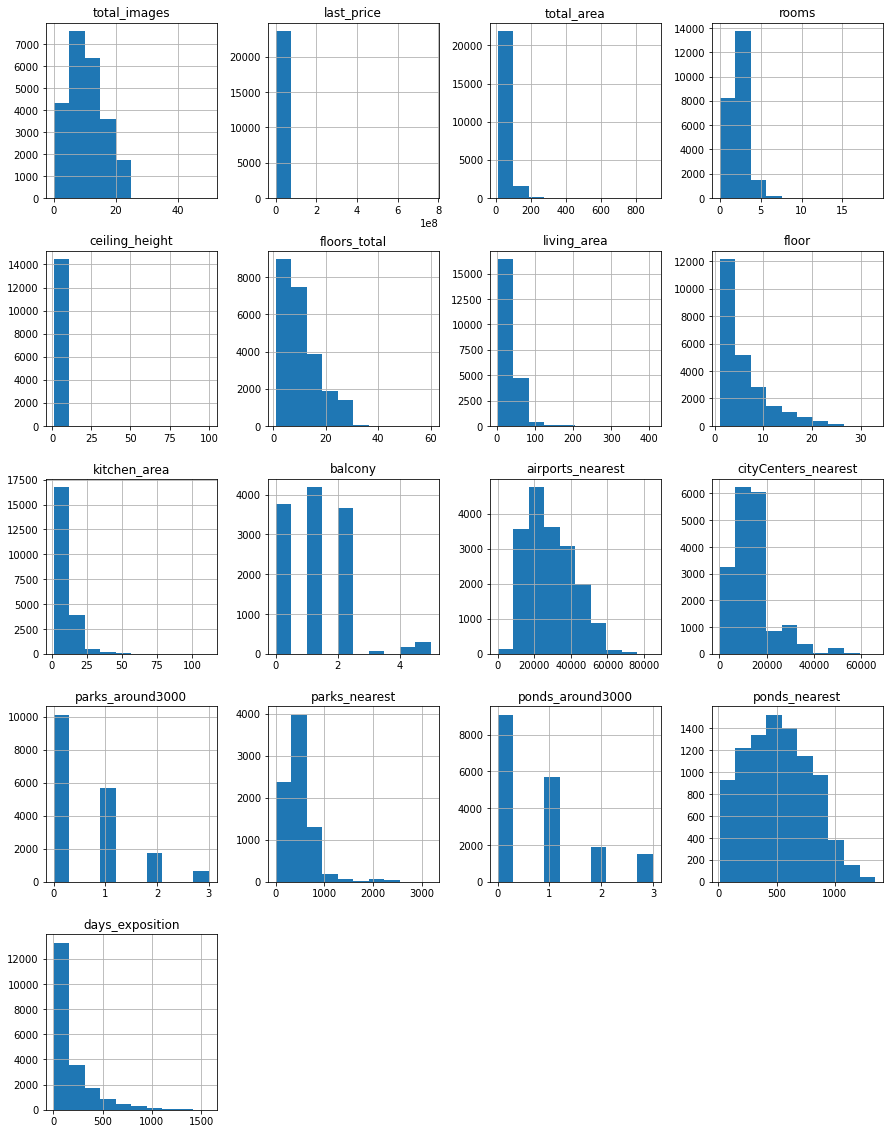

In [ ]:
data.hist(figsize=(15,20))

**Итоги первого шага:**


Подключены необходимые библиотеки. Прочитан файл с таблицей и загружен в Датафрейм, выведена общая информация по таблице, первые 5 строк. Построены гистограммы всех числовых зависимостей.

### 2  Предобработка данных

#### <b>Поиск пропущенных значений </b>

In [ ]:
#Выводим пропущенные значения по столбцам
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

<b> Начиная исправлять наличие пропущенных значений по порядку выведенного списка можно сказать что, пропущенных значений в столбце с высотой потолка много, удалять нельзя, заполним средний значением по столбцу, так как этот параметр не зависит от  остальных.</b>

In [ ]:
#Заполнение пропусков в столбце с высотой потолка
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

<b> В столбце для этажей пустых значений мало и также заметим, что разброс между этажами большой, да и данный параметр будет сильно влиять на стоимость
квартиры, поэтому эти строки можно удалить, да и отследить от чего будет зависеть количество этажей непонятно как. </b>

In [ ]:
#Обработка столбца с количеством этажей, удаление пропущенных значений
shape_start = data.shape[0]
data = data.dropna(subset=['floors_total'])

<b>Рассмотрим столбец с площадью жилой зоны.Пропущенных значений в нем 1905, чуть меньше 10% от всего количества строк, лучше не удалять. Площадь жилой зоны на прямую должна зависеть от количества комнат. Проследим эту зависимость.</b>

In [ ]:
#Группируем по количеству комнат и находим среднее в каждой категории
pivot_rooms = data.groupby('rooms')['living_area'].mean()
#Заполним пропуски усредненным значением площади недвижимости взятым по количеству комнат
def fill_square(row):
    if pd.isnull(row['living_area']):
        return pivot_rooms[row['rooms']]
    return row['living_area']
data['living_area'] = data.apply(fill_square, axis=1)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

<b>Рассмотрим столбец is_apartment в нем очень много пропусков. Апартаментами считается та недвижимость площадью не менее 40 $м^2$  и там где более 1 комнаты. С учетом этого условия и заполним пропуски.</b>

In [ ]:
#Избавляемся от пропусков в столбце с апаратаментами
def fill_missing_apartments(row):
    if pd.isnull(row['is_apartment']) and row['total_area'] >= 40 and row['rooms'] > 1:
        return True
    return False
data['is_apartment'] = data.apply(fill_missing_apartments, axis=1)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

<b>Площадь кухни можно заполнить средним в зависимости от площади всей недвижимости.</b>

In [ ]:
#Заполнение пропусков в столбце с площадью кухни
pivot_kitchen = data.groupby('total_area')['kitchen_area'].mean()
def fill_kitchen(row):
    if pd.isnull(row['kitchen_area']):
        return pivot_kitchen[row['total_area']]
    return row['kitchen_area']
data['kitchen_area'] = data.apply(fill_kitchen, axis=1)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              185
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

<b> В столбце все равно остались пропуски, это те значения, у которых не было среднего, поэтому в этих ячейках и остались неопределенности, их немного, поэтому удалим эти строки</b>

In [ ]:
data = data.dropna(subset = ['kitchen_area'])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11380
locality_name              48
airports_nearest         5459
cityCenters_nearest      5436
parks_around3000         5435
parks_nearest           15433
ponds_around3000         5435
ponds_nearest           14443
days_exposition          3162
dtype: int64

In [ ]:
#Заполняем пропуски в столбце с количеством балконов. Заполним 0, потому что отсутствие значений может означать и отсутствие самого балкона.
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5459
cityCenters_nearest      5436
parks_around3000         5435
parks_nearest           15433
ponds_around3000         5435
ponds_nearest           14443
days_exposition          3162
dtype: int64

In [ ]:
# пропуски в locality name  заполним отдельным названием unknown
data['locality_name'] = data['locality_name'].fillna('unknown')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5459
cityCenters_nearest      5436
parks_around3000         5435
parks_nearest           15433
ponds_around3000         5435
ponds_nearest           14443
days_exposition          3162
dtype: int64

<div class='alert alert-info'>

<b> Остальные пропуски оставим без изменений </b>
</div>

**Остались пропущенные значения в столбце с количеством дней размещения. Едиственное, что можно предположить, что данный параметр зависит от местности, аналогичными группировками заполним.**

<div class="alert alert-info">
    
**Видим, что пропущенные значения остались, оставим его как есть, может объявления ещё не сняты. Теперь посмотрим какой процент строк был удален.**
    
</div>

In [ ]:
finish_shape = data.shape[0]
print('Процент удаленных строк: ')
((shape_start - finish_shape) / shape_start) * 100

Процент удаленных строк: 


1.1435081649014727

#### <b>Изменяем типы данных </b>

In [ ]:
#Выводим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23428 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23428 non-null  int64  
 1   last_price            23428 non-null  float64
 2   total_area            23428 non-null  float64
 3   first_day_exposition  23428 non-null  object 
 4   rooms                 23428 non-null  int64  
 5   ceiling_height        23428 non-null  float64
 6   floors_total          23428 non-null  float64
 7   living_area           23428 non-null  float64
 8   floor                 23428 non-null  int64  
 9   is_apartment          23428 non-null  bool   
 10  studio                23428 non-null  bool   
 11  open_plan             23428 non-null  bool   
 12  kitchen_area          23428 non-null  float64
 13  balcony               23428 non-null  float64
 14  locality_name         23428 non-null  object 
 15  airports_nearest   

 Просмотрев столбцы, можно заметить столбец с датой с типом **object**, изменим тип на **datetime**.

In [ ]:
#Замена типа столбца с датой
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-info">
    
В столбцах **floors_total**, **balcony** значения отвечают за какое то количество, поэтому следует перевести столбцы из типа **float64** в целочисленный тип **int64**.


В столбцах **parks_around3000**, **ponds_around3000**, **days_exposition** тоже можно было бы перевести, но там есть некорректные значения.
</div>    

In [ ]:
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23428 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23428 non-null  int64         
 1   last_price            23428 non-null  float64       
 2   total_area            23428 non-null  float64       
 3   first_day_exposition  23428 non-null  datetime64[ns]
 4   rooms                 23428 non-null  int64         
 5   ceiling_height        23428 non-null  float64       
 6   floors_total          23428 non-null  int64         
 7   living_area           23428 non-null  float64       
 8   floor                 23428 non-null  int64         
 9   is_apartment          23428 non-null  bool          
 10  studio                23428 non-null  bool          
 11  open_plan             23428 non-null  bool          
 12  kitchen_area          23428 non-null  float64       
 13  balcony         

<div class="alert alert-info">
    Раз пропуски в столбце с объявлениями остались, то преобразовать его в другой тип уже не получается.
</div>

#### <b>Поиск дубликатов</b>

In [ ]:
#просмотр явных дубликатов
data[data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Видим, что явных дубликатов нету, поэтому далее рассмотрим столбец с названиями населенных пунктов

In [ ]:
#Выведем уникальные значения в столбце с названием местности
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
#Поиск неявных дубликатов
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = (data['locality_name'].str.replace('ё', 'е').replace(['поселок городского типа Рябово'], 'поселок Рябово', regex=True))

**Сначала приведем все к нижнему регистру и поменяем обозначение названия поселка Рябово.**

**Итоги по второму шагу:**


В данной части проекта проведена предобрадотка данных. При анализе пропущенных значений в таблице было найдено много таких ячеек. Отталкиваясь от количества именно по каждому столбцу, такие значения заполнялись с некотороми зависимостями, в основном эта зависимость была от местности. Некоторые пропущенные значения были удалены. А также приведен процент удаленных строк, он составил 1.5 % , что является допустимым. В таблице конечно остались пропущенные значения, но удалять их уже не стоит, так как относительно размеров датасета их много, придется их оставить как есть.


Для 4 столбцах Датафрейма можно было изменить тип, особенно выделялся столбец с датой. Остальные 3 имели вещественный тип, но числа обозначали количество чего либо, и эти параметры не могли быть дробными, поэтому эти столбцы переведены в целочисленный тип данных.


Явных дубликатов выявлено не было, но нашелся не явный дубликат, где имя населенного пункта приведено к одному обозначению.

### 3 Добавляем столбцы

In [ ]:
#Добавляем столбец со стоимостью 1 квадртного метра
data['cost_of_one_square'] = round(data['last_price'] / data['total_area'], 2)

In [ ]:
#Добавляем день недели публикации
data['day_week_publication'] = data['first_day_exposition'].dt.weekday
data['day_week_publication'] = data['day_week_publication'].map({0: 'Понедельник',
                                                                 1: 'Вторник',
                                                                 2: 'Среда',
                                                                 3: 'Четверг',
                                                                 4: 'Пятница',
                                                                 5: 'Суббота',
                                                                 6: 'Воскресенье'})

In [ ]:
#Добавляем месяца
data['month'] = data['first_day_exposition'].dt.month
data['month'] = data['month'].map({1: 'Январь',
                                           2: 'Февраль',
                                           3: 'Март',
                                           4: 'Апрель',
                                           5: 'Май',
                                           6: 'Июнь',
                                           7: 'Июль',
                                           8: 'Август',
                                           9: 'Сентябрь',
                                           10:'Октябрь',
                                           11:'Ноябрь',
                                           12:'Декабрь'})

In [ ]:
#Добавляем года
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
#Добавляем тип этажа
def floor_type(row):
    if row['floors_total'] == row['floor'] :
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

In [ ]:
#Перевод расстояния до центра из метров в километры
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

**Итоги третьего шага:**


В Датафрейм добавлены столбцы:
- с ценой одного квадратного метра недвижимости;
- столбец с днем недели, в который было выложено объявление  о продаже;
- столбец с месяцем, в который было выложено объявление  о продаже;
- год, когда было выложено объявление;
- столбец, где расстояние до центра города переведено в километры

### 4 Исследовательский анализ

#### 4.1 Аномалии

##### Общая площадь

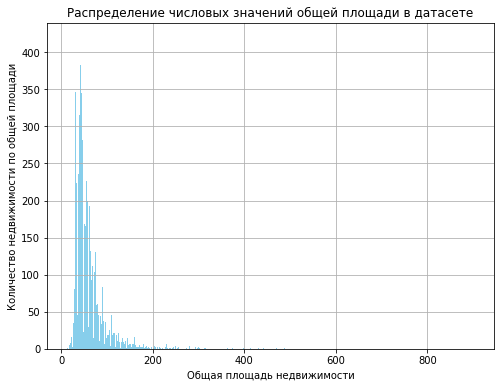

,total_area,counts
1395,14.0,1
1001,17.0,2
667,18.0,5
1192,18.4,1
558,20.0,8
...,...,...
1646,590.0,1
1753,618.0,1
1903,631.0,1
1908,631.2,1


In [ ]:
#Анализ аномалий в столбце с общей площадью
data_counts_total = pd.DataFrame()
data_counts_total['counts'] = data['total_area'].value_counts()
data_counts_total = data_counts_total.reset_index()
data_counts_total = data_counts_total.rename(columns = {'index' : 'total_area'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_total['total_area'], data_counts_total['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по общей площади')
plt.xlabel('Общая площадь недвижимости')
plt.title('Распределение числовых значений общей площади в датасете')
plt.show()
data_counts_total.sort_values(by = 'total_area')

In [ ]:
#Вывод последних 20 значений
data_counts_total.sort_values(by = 'total_area').tail(20)

,total_area,counts
1864,401.00,1
1827,402.00,1
1703,410.00,1
1641,413.50,1
1882,431.00,1
1401,441.98,1
1872,460.80,1
1094,470.30,1
1869,483.90,1
1756,488.00,1


**Видим, что самое последенее значение отбивается от остальных, разница практически в 300 единиц, можно удалить это значение**

In [ ]:
#Удаляем строку, где общая площадь 900 метров квадратных
data = data.loc[data['total_area'] != 900]
data.shape

(23427, 28)

In [ ]:
data_other = data.loc[data['total_area'] < 500]
data_other.shape

(23419, 28)

<div class='alert alert-info'>
    Рассмотрим на размерность датасетов при разных условиях, видим что теряется не очень много строк.
</div>

Text(0, 0.5, 'Количество недвижимости по общей площади')

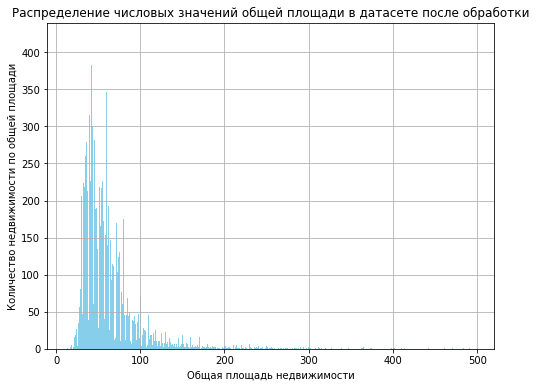

In [ ]:
data_counts_total_after = pd.DataFrame()
data_counts_total_after['counts'] = data_other['total_area'].value_counts()
data_counts_total_after = data_counts_total_after.reset_index().rename(columns = {'index' : 'total_area'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_total_after['total_area'], data_counts_total_after['counts'], color='skyblue')
plt.title('Распределение числовых значений общей площади в датасете после обработки')
plt.grid(True)
plt.xlabel('Общая площадь недвижимости')
plt.ylabel('Количество недвижимости по общей площади')

In [ ]:
data = data_other

<div class='alert alert-info'>
А вот гистограмма получилась более нагляднее, скорее всего ещё можно уменьшить общую площадь, но тогда остануться только квартиры с маленькой площадью, раз изначально  присутствуют квартиры с площадью 900 квадртаных метров, то большие квартиры тоже стоит учесть до 500 метров квадратных. Сразу можно вделить, что на продажу в основном идут квартиры до 100 квадратных метров.
</div>

##### Жилая площадь

,living_area,counts
868,2.0,2
689,3.0,2
1491,5.0,1
1043,5.4,1
1495,6.0,1
...,...,...
1563,274.0,1
1395,279.6,1
995,300.0,1
1256,312.5,1


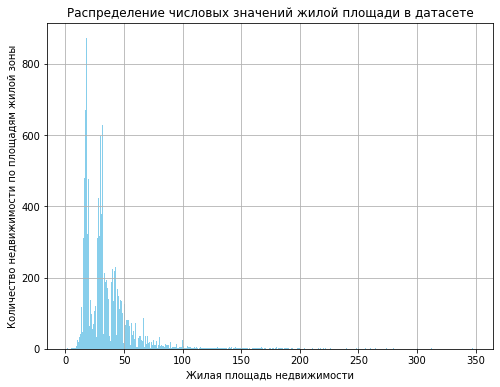

In [ ]:
#Анализ аномалий в столбце с жилой площадью
data_counts_living = pd.DataFrame()
data_counts_living['counts'] = data['living_area'].value_counts()
data_counts_living = data_counts_living.reset_index().rename(columns = {'index' : 'living_area'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_living['living_area'], data_counts_living['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по площадям жилой зоны')
plt.xlabel('Жилая площадь недвижимости')
plt.title('Распределение числовых значений жилой площади в датасете')
data_counts_living.sort_values(by = 'living_area')

**Видим появились слишком маленькие значения жилой площади. В таком случае оставим только те строки, где жилая площадь больше 10 метров квадратных, также можно удалить и  те, площадь у которых больше 200.**

In [ ]:
#Удаляем строку, где жилая площадь меньше 10 метров квадратных
data = data.loc[(data['living_area'] >= 10) & (data['living_area'] <= 200)]

Text(0.5, 1.0, 'Распределение числовых значений жилой площади в датасете после обработки')

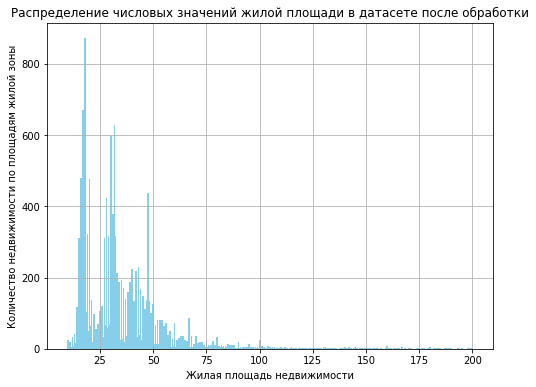

In [ ]:
data_counts_living_after = pd.DataFrame()
data_counts_living_after['counts'] = data['living_area'].value_counts()
data_counts_living_after = data_counts_living_after.reset_index().rename(columns = {'index' : 'living_area'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_living_after['living_area'], data_counts_living_after['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по площадям жилой зоны')
plt.xlabel('Жилая площадь недвижимости')
plt.title('Распределение числовых значений жилой площади в датасете после обработки')

##### Площадь кухни

,kitchen_area,counts
0,6.000000,1315
1,10.000000,1263
2,8.000000,1111
3,9.000000,1100
4,7.000000,1062
...,...,...
1409,7.180000,1
1410,9.440000,1
1411,12.457273,1
1412,8.950000,1


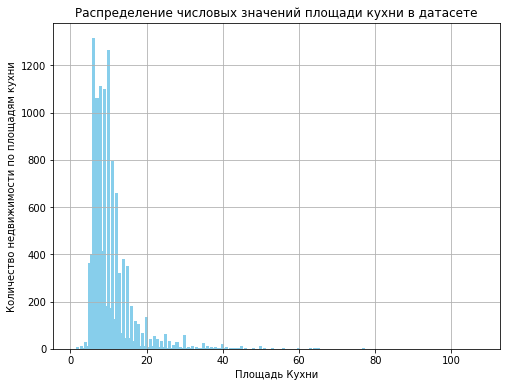

In [ ]:
#Анализ аномалий в столбце с площадью кухни
data_counts_kitchen = pd.DataFrame()
data_counts_kitchen['counts'] = data['kitchen_area'].value_counts()
data_counts_kitchen = data_counts_kitchen.reset_index().rename(columns = {'index' : 'kitchen_area'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_kitchen['kitchen_area'], data_counts_kitchen['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по площадям кухни')
plt.xlabel('Площадь Кухни')
plt.title('Распределение числовых значений площади кухни в датасете')
data_counts_kitchen

In [ ]:
#ВЫвод последних 20 строк
data_counts_kitchen.tail(20)

,kitchen_area,counts
1394,13.730000,1
1395,9.323077,1
1396,6.650000,1
1397,14.740000,1
1398,53.100000,1
1399,13.410000,1
1400,8.180000,1
1401,12.390000,1
1402,7.252632,1
1403,14.650000,1


**Заметим выбивающиеся значения как и в списке последних 20 строк таблицы, так и на гистограмме, в промежутке между 77 и 87.2 нету ни одного элементы. Но все равно отличие не очень большое, поэтому можно оставить их.**

In [ ]:
#ВЫвод первыъ 20 строк
data_counts_kitchen.head(20)

,kitchen_area,counts
0,6.0,1315
1,10.0,1263
2,8.0,1111
3,9.0,1100
4,7.0,1062
5,11.0,795
6,12.0,660
7,8.5,414
8,5.5,400
9,14.0,382


**Также и в начале распределения встречаем сомнительные значения, слишком маленькая площадь кухни, оставим только те строки, где площадь кухни больше и равна 4 квадратных метра.**

In [ ]:
data = data.query('kitchen_area >= 4')
data.shape

(23333, 28)

Text(0.5, 1.0, 'Распределение числовых значений площади кухни в датасете после обработки')

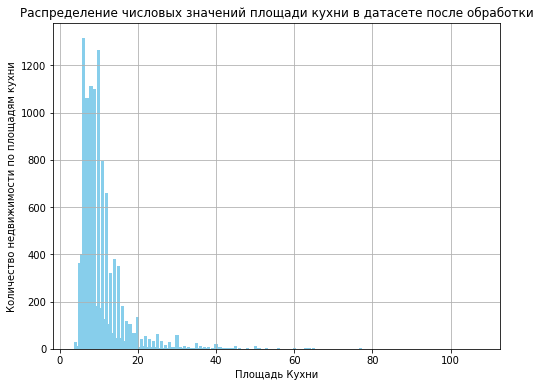

In [ ]:
data_counts_kitchen_after = pd.DataFrame()
data_counts_kitchen_after['counts'] = data['kitchen_area'].value_counts()
data_counts_kitchen_after = data_counts_kitchen_after.reset_index().rename(columns = {'index' : 'kitchen_area'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_kitchen_after['kitchen_area'], data_counts_kitchen_after['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по площадям кухни')
plt.xlabel('Площадь Кухни')
plt.title('Распределение числовых значений площади кухни в датасете после обработки')

##### Цена объекта

,last_price,counts
2174,0.01219,1
1071,0.43000,2
1419,0.44000,1
596,0.45000,4
669,0.47000,3
...,...,...
1516,160.00000,1
2840,190.87000,1
1637,245.00000,1
1252,289.23840,1


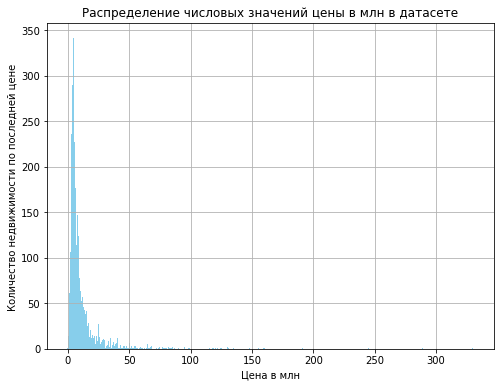

In [ ]:
#Анализ аномалий в столбце с ценой
data_counts_price = pd.DataFrame()
data_counts_price['counts'] = data['last_price'].value_counts()
data_counts_price = data_counts_price.reset_index().rename(columns = {'index' : 'last_price'}).sort_values(by = 'last_price')
# переведем цену в миллионы, чтобы соотнести порядки значений на осях
data_counts_price['last_price'] = data_counts_price['last_price'] / (10**6)
plt.figure(figsize=(8, 6))
plt.bar(data_counts_price['last_price'], data_counts_price['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по последней цене ')
plt.xlabel('Цена в млн')
plt.title('Распределение числовых значений цены в млн в датасете')
data_counts_price

**Рассмотрим самую маленькую цену за недвижимость**

In [ ]:
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_one_square,day_week_publication,month,year,floor_type,cityCenters_nearest_km
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,805.0,0.0,NaN,8.0,111.83,Среда,Март,2019,последний,9.0


**Недвижимость с двумя комнатами и общей площадью 109 квадртаных метров очень недооценена. Возможно произошла ошибка при заполнении цены, оставим её, но цену домножим на 1000.**

In [ ]:
index = data[data['last_price'] == 12190].index[0]
data.loc[index, 'last_price'] = 12190000

In [ ]:
data[data['last_price'] == 12190000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_one_square,day_week_publication,month,year,floor_type,cityCenters_nearest_km
8793,7,12190000.0,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,805.0,0.0,NaN,8.0,111.83,Среда,Март,2019,последний,9.0
16579,19,12190000.0,100.0,2017-11-23,3,2.90,16,51.0,5,True,...,NaN,0.0,NaN,241.0,121900.00,Четверг,Ноябрь,2017,другой,12.0


**Значение подставлено правильно.**

,last_price,counts
1081,0.4300,2
1199,0.4400,1
569,0.4500,4
778,0.4700,3
2535,0.4800,1
...,...,...
1133,160.0000,1
2839,190.8700,1
1673,245.0000,1
1115,289.2384,1


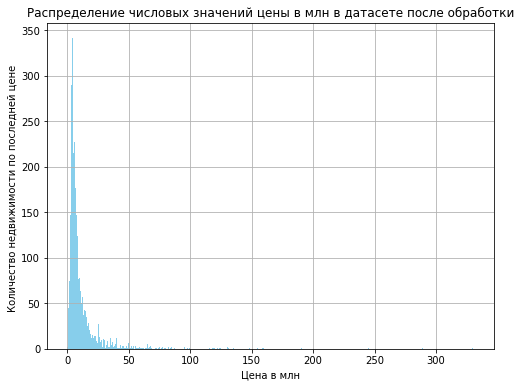

In [ ]:
data_counts_price_after = pd.DataFrame()
data_counts_price_after['counts'] = data['last_price'].value_counts()
data_counts_price_after = (data_counts_price_after.reset_index()
                           .rename(columns = {'index' : 'last_price'}).sort_values(by = 'last_price'))
data_counts_price_after['last_price'] = data_counts_price_after['last_price'] / (10**6)
plt.figure(figsize=(8, 6))
plt.bar(data_counts_price_after['last_price'], data_counts_price_after['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по последней цене ')
plt.xlabel('Цена в млн')
plt.title('Распределение числовых значений цены в млн в датасете после обработки')
data_counts_price_after

##### Количество комнат

,rooms,counts
0,1,7898
1,2,7881
2,3,5783
3,4,1165
4,5,312
5,0,131
6,6,98
7,7,43
8,8,9
9,9,6


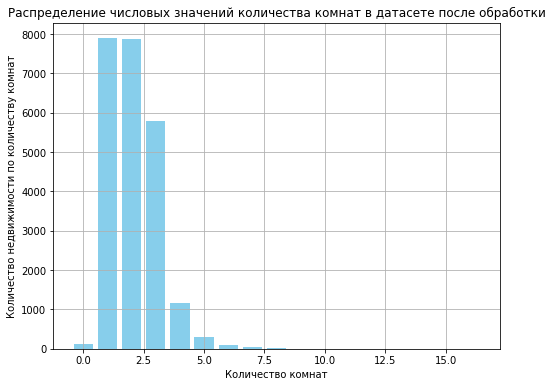

In [ ]:
#Анализ аномалий в столбце с количеством комнат
data_counts_rooms = pd.DataFrame()
data_counts_rooms['counts'] = data['rooms'].value_counts()
data_counts_rooms = data_counts_rooms.reset_index().rename(columns = {'index' : 'rooms'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_rooms['rooms'], data_counts_rooms['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по количеству комнат')
plt.xlabel('Количество комнат')
plt.title('Распределение числовых значений количества комнат в датасете после обработки')
data_counts_rooms

**Заметим на гистограмме есть участок с количеством комнат отрывающийся от других.**

In [ ]:
data[data['rooms'] > 12 ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_one_square,day_week_publication,month,year,floor_type,cityCenters_nearest_km
18848,6,28500000.0,270.0,2015-03-02,16,3.000000,4,180.0,4,True,...,516.0,0.0,NaN,1365.0,105555.56,Понедельник,Март,2015,последний,4.0
20829,6,28659000.0,245.4,2016-03-31,14,2.771499,4,168.3,2,True,...,541.0,2.0,118.0,95.0,116784.84,Четверг,Март,2016,другой,2.0


**Посмотрев на данные объявлений с такой недвижимостью можно сказать, что выбросов нет, все параметры могут соответствовать такому количеству комнат.**

**Однако 130 строк содержат информацию о недвижимостях с 0 комнат, чего быть не может. Удалим эти строки.**

In [ ]:
data = data.query('rooms != 0')
data.shape

(23202, 28)

Text(0.5, 1.0, 'Распределение числовых значений количества комнат в датасете после обработки')

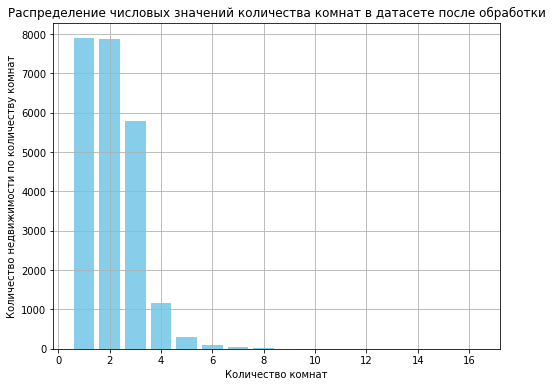

In [ ]:
data_counts_rooms_after = pd.DataFrame()
data_counts_rooms_after['counts'] = data['rooms'].value_counts()
data_counts_rooms_after = data_counts_rooms_after.reset_index().rename(columns = {'index' : 'rooms'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_rooms_after['rooms'], data_counts_rooms_after['counts'], color='skyblue')
plt.grid(True)
plt.ylabel('Количество недвижимости по количеству комнат')
plt.xlabel('Количество комнат')
plt.title('Распределение числовых значений количества комнат в датасете после обработки')

##### Высота потолков

,ceiling_height,counts
138,1.00,1
143,1.20,1
151,1.75,1
58,2.00,11
160,2.20,1
...,...,...
163,26.00,1
74,27.00,7
153,27.50,1
122,32.00,2


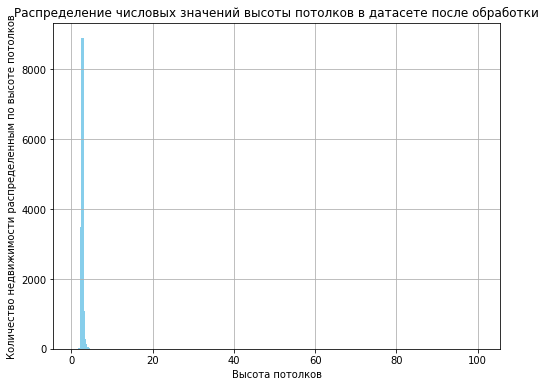

In [ ]:
#Анализ аномалий в столбце с высотой потолка
data_counts_height = pd.DataFrame()
data_counts_height['counts'] = data['ceiling_height'].value_counts()
data_counts_height = (data_counts_height.reset_index().
                      rename(columns = {'index' : 'ceiling_height'}).sort_values(by = 'ceiling_height'))
plt.figure(figsize=(8, 6))
plt.bar(data_counts_height['ceiling_height'], data_counts_height['counts'], color='skyblue')
plt.title('Распределение числовых значений высоты потолков в датасете после обработки')
plt.grid(True)
plt.xlabel('Высота потолков')
plt.ylabel('Количество недвижимости распределенным по высоте потолков')
data_counts_height

In [ ]:
data_counts_height.tail(20)

,ceiling_height,counts
149,4.8,1
167,4.9,1
152,5.0,1
166,5.2,1
123,5.3,2
154,5.5,1
147,6.0,1
113,8.0,3
175,8.3,1
178,10.3,1


**Много аномальных значений, особенно 100, строку с таким значением точно нужно удалить, но есть и много других не стандартных высот. Вряд ли высота потолка может быть 8 метров, возьмем крайнее значение сверху 6 метров, а крайнее снизу 2.2 метра. Значения от 6 и выше до 22 метров преобразовать не получиться, даже есть там ошибка в разряде числа, поэтому значения от 6 до 22.0 можно удалить и также 100, а вот от 22 до 32, возможно произошла ошибка в разряде числа, поделим на 10 и получим более менее хорошие цифры для высоты потолка**

In [ ]:
print(data[(data['ceiling_height'] < 22) & (data['ceiling_height'] > 6) ].shape[0])

7


**Такие значений только 7, ещё восьмое когда высота 100, серьезных последставий датасету не принесет избавление от этих строк.**

In [ ]:
data = data.query('(ceiling_height > 22) | (ceiling_height < 6)')
data = data.query('ceiling_height != 100')

**Но есть ещё и слишком маленькие значения. К ним применим такую же схему, только с нижней границей (2.2).**

In [ ]:
data = data.query('ceiling_height > 2.2')

**Заключительное действие, нужно привести остальные значения высоты в нормальный формат, поделим на 10.**

In [ ]:
data.loc[data['ceiling_height'] > 6,'ceiling_height'] = data.loc [data['ceiling_height'] > 6,'ceiling_height'] / 10

Text(0.5, 1.0, 'Распределение числовых значений высоты потолков в датасете после обработки')

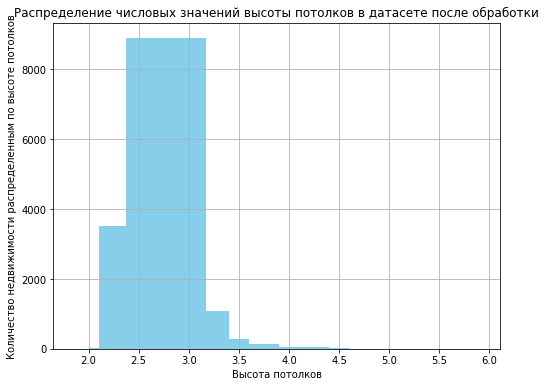

In [ ]:
data_counts_height_after = pd.DataFrame()
data_counts_height_after['counts'] = data['ceiling_height'].value_counts()
data_counts_height_after = data_counts_height_after.reset_index().rename(columns = {'index' : 'ceiling_height'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_height_after['ceiling_height'], data_counts_height_after['counts'], color='skyblue')
plt.grid(True)
plt.xlabel('Высота потолков')
plt.ylabel('Количество недвижимости распределенным по высоте потолков')
plt.title('Распределение числовых значений высоты потолков в датасете после обработки')

<div class='alert alert-info'>
    После обработки гистограмма выходит более читаемой. Можно сразу выделить учаток с самой частой высотой потолка, это промежуток от 2.5 до 3 метров.
</div>

##### Тип этажа квартиры

,floor_type,counts
2,первый,2839
1,последний,3308
0,другой,17031


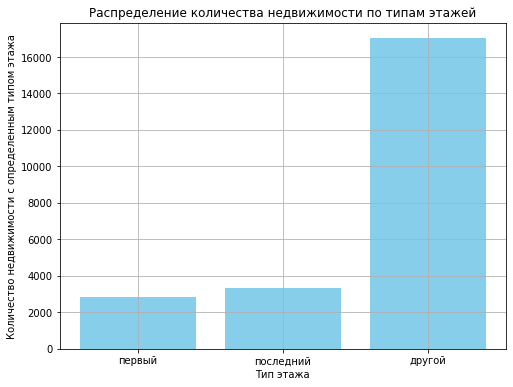

In [ ]:
#Построение гистограммы для типов этажей
data_counts_floor = pd.DataFrame()
data_counts_floor['counts'] = data['floor_type'].value_counts()
data_counts_floor = data_counts_floor.reset_index().rename(columns = {'index' : 'floor_type'}).sort_values(by = 'counts')
plt.figure(figsize=(8, 6))
plt.bar(data_counts_floor['floor_type'], data_counts_floor['counts'], color='skyblue')
plt.title('Распределение количества недвижимости по типам этажей')
plt.grid(True)
plt.xlabel('Тип этажа')
plt.ylabel('Количество недвижимости с определенным типом этажа')
data_counts_floor

<div class='alert alert-info'>


**Из полученной гистограммы можно сказать, что недвижимости(квартир) больше продаются не на первом и последнем этажах, а так сказать в середине дома.
Также последние этажи более предпочтительнее, чем первые.**
</div>

##### Общее количество этажей в доме

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 33 34 35 36 52 60]


,floors_total,counts
26,1,23
15,2,374
9,3,654
4,4,1185
0,5,5730
7,6,900
10,7,577
14,8,381
1,9,3733
5,10,1165


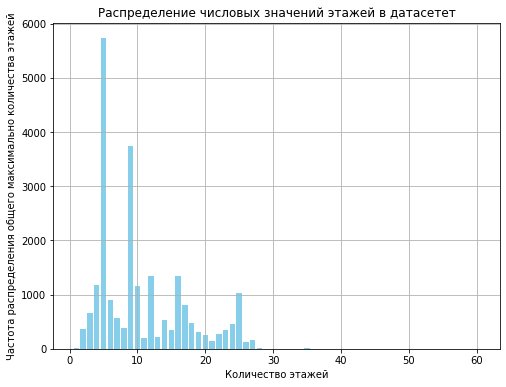

In [ ]:
#Анализ аномалий в столбце с общим количеством этажей в доме
data_counts_floors = pd.DataFrame()
data_counts_floors['counts'] = data['floors_total'].value_counts()
data_counts_floors = (data_counts_floors.reset_index().
                      rename(columns = {'index' : 'floors_total'}).sort_values(by = 'floors_total'))
plt.figure(figsize=(8, 6))
plt.bar(data_counts_floors['floors_total'], data_counts_floors['counts'], color='skyblue')
plt.title('Распределение числовых значений этажей в датасетет')
plt.grid(True)
plt.xlabel('Количество этажей')
plt.ylabel('Частота распределения общего максимально количества этажей')
print(data_counts_floors['floors_total'].unique())
data_counts_floors

<div class='alert alert-info'>
    
**Сразу видно несколько выбивающихся значения, с этажами выше 27 их очень мало, поэтому можно удалить.**
</div>

In [ ]:
data = data.query('floors_total < 28')

Text(0, 0.5, 'Частота распределения общего максимально количества этажей')

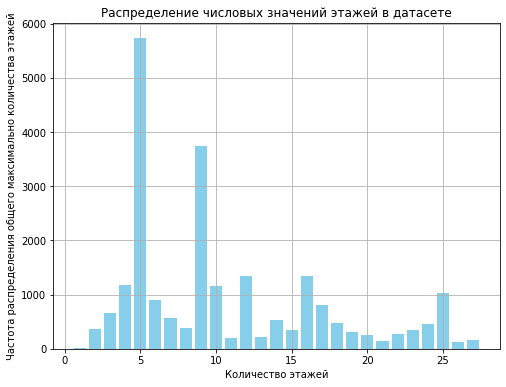

In [ ]:
#После корректировки
data_counts_floors_after = pd.DataFrame()
data_counts_floors_after['counts'] = data['floors_total'].value_counts()
data_counts_floors_after = data_counts_floors_after.reset_index().rename(columns = {'index' : 'floors_total'})
plt.figure(figsize=(8, 6))
plt.bar(data_counts_floors_after['floors_total'], data_counts_floors_after['counts'], color='skyblue')
plt.title('Распределение числовых значений этажей в датасете')
plt.grid(True)
plt.xlabel('Количество этажей')
plt.ylabel('Частота распределения общего максимально количества этажей')

##### Расстояние до центра города в метрах

,cityCenters_nearest,counts
5914,0.181,1
6450,0.208,1
4859,0.215,1
6403,0.287,1
6206,0.291,1
...,...,...
7496,64.857,1
7358,65.105,1
7343,65.764,1
5095,65.952,1


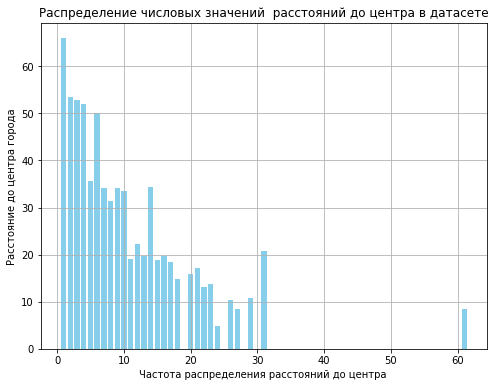

In [ ]:
#Анализ аномалий в столбце с расстоянием до центра
data_counts_nearest = pd.DataFrame()
data_counts_nearest['counts'] = data['cityCenters_nearest'].value_counts()
data_counts_nearest = (data_counts_nearest.reset_index().
                       rename(columns = {'index' : 'cityCenters_nearest'}).sort_values(by = 'cityCenters_nearest'))
data_counts_nearest['cityCenters_nearest'] = data_counts_nearest['cityCenters_nearest'] * 10**(-3)
plt.figure(figsize=(8, 6))
plt.bar(data_counts_nearest['counts'], data_counts_nearest['cityCenters_nearest'], color='skyblue')
plt.title('Распределение числовых значений  расстояний до центра в датасете')
plt.grid(True)
plt.ylabel('Расстояние до центра города')
plt.xlabel('Частота распределения расстояний до центра ')
data_counts_nearest

<div class='alert alert-info'>
    
**Из полученного распределения видно, что чаще всего недвижимость находится ближе 30 киллометров центра. Удалять строки с частотой 61 не стоит, так как они составляют в основаном данные расстояния в датасете, хоть и эти значения выделяются. Реже всего недвижимость продают дальше 30 киллометров от центра.**
</div>

##### Расстояние до ближайшего парка

,parks_nearest,counts


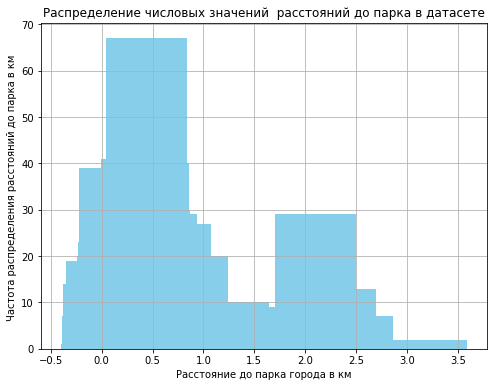

In [ ]:
#Анализ аномалий в столбце с расстоянием до парка
data_counts_park = pd.DataFrame()
data_counts_park['counts'] = data['parks_nearest'].value_counts()
data_counts_park = (data_counts_park.reset_index().
                   rename(columns = {'index' : 'parks_nearest'}).sort_values(by = 'parks_nearest'))
#Переведем в километры
data_counts_park['parks_nearest'] = data_counts_park['parks_nearest'] * 10**(-3)
plt.figure(figsize=(8, 6))
plt.bar(data_counts_park['parks_nearest'], data_counts_park['counts'], color='skyblue')
plt.title('Распределение числовых значений  расстояний до парка в датасете')
plt.grid(True)
plt.xlabel('Расстояние до парка города в км')
plt.ylabel('Частота распределения расстояний до парка в км ')
data_counts_park.query('parks_nearest < 0')

<div class='alert alert-info'>
 Отсюда можно сказать, что наиболее частое расстояние до парка, 0.5 км.
</div>

In [ ]:
data_counts_park.query('parks_nearest < 0')

,parks_nearest,counts


**Отрицательных значений нету**

In [ ]:
data_shape = data.shape[0]
data_shape
print('На данном этапе удалено ', round(((shape_start - data_shape) / shape_start), 3) * 100, '% строк')

На данном этапе удалено  2.4 % строк


**Как и в предыдущем примере аномальных значений нету, оставляем столбец без корректировок.**

#### 4.2 Как быстро продавались квартиры

Text(0.5, 1.0, 'Распределение продаваемости недвижимости')

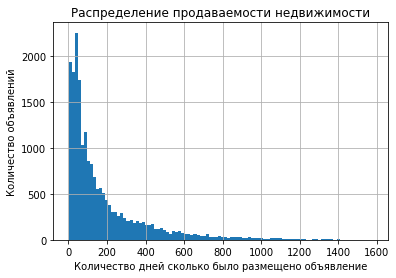

In [ ]:
data['days_exposition'].hist(bins = 100)
plt.xlabel('Количество дней сколько было размещено объявление')
plt.ylabel('Количество объявлений')
plt.title('Распределение продаваемости недвижимости')

In [ ]:
#Выводим характеристики
print('Медианное значение:', data['days_exposition'].median())
print('Среднее значение:', data['days_exposition'].mean())
print('Максимальное значение:', data['days_exposition'].max())
print('Минимальное значение:', data['days_exposition'].min())

Медианное значение: 96.0
Среднее значение: 181.63932213557288
Максимальное значение: 1580.0
Минимальное значение: 1.0


count    20004.000000
mean       181.639322
std        220.278440
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

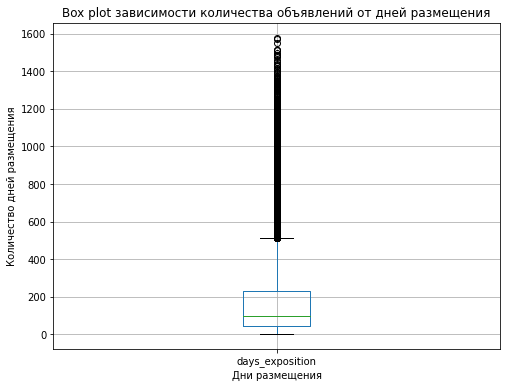

In [ ]:
plt.figure(figsize=(8, 6))
data.boxplot('days_exposition')
plt.title('Box plot зависимости количества объявлений от дней размещения')
plt.ylabel('Количество дней размещения')
plt.xlabel('Дни размещения')
data['days_exposition'].describe()

<div class='alert alert-info'>

**Можно сказать, что в среднем продажа квартиры занимает около полугода (181 день). Однако, медианное значение продолжительности продажи (96 день) говорит о том, что половина квартир продается быстрее, чем за это время. Максимальное значение в 1580 дней и минимальное в 1 день указывают на тот факт, что временные рамки продажи могут значительно различаться в зависимости от конкретной ситуации и рыночных условий.**


**Из построенной диагрммы размаха можно сказать, что недвижимость, которая продавалась меньше 45 дней и дольше 232 дней, продается слишком быстро и слишком долго соответственно, если срок продажи лежит в промежутке этого времени, то срок соответствует нормальному времени продажи.**
</div>

#### 4.3 Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта.

In [ ]:
#Функция для построения графиков
def charts(array_one, array_two, name_xlabel):
    r = array_one.corr(array_two)
    b = r * array_one.std() / array_two.std()
    a = array_one.mean() - b * array_two.mean()
    plt.figure(figsize=(8, 6))
    plt.scatter(array_two, array_one, label='Данные')
    plt.plot(array_two, b * array_two + a, color='red', label=f'Линия тренда: y = {b:.2f}x + {a:.2f}')
    plt.xlabel(name_xlabel)
    plt.ylabel('Стоимость')
    plt.legend()
    plt.grid(True)
    plt.show()

##### Зависимость стоимости от общей площади

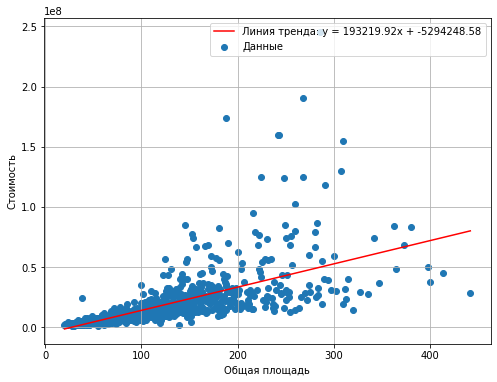

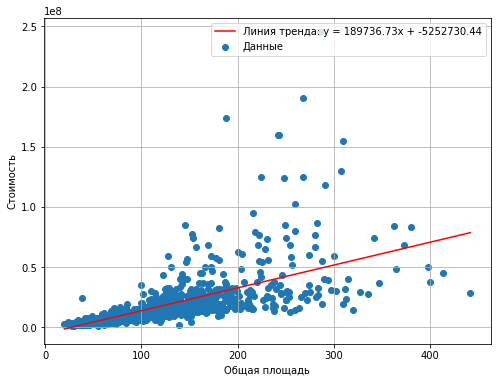

In [ ]:
#Зависимость стоимости от общей площади
data_mean = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'mean')
data_median = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
data_mean = data_mean.reset_index()
data_median = data_median.reset_index()
charts(data_mean['last_price'], data_mean['total_area'], 'Общая площадь')
charts(data_median['last_price'], data_median['total_area'], 'Общая площадь')

In [ ]:
#Проверка на линейную зависимость
print('Коэффициент корреляции для среднего значения', data_mean['total_area'].corr(data_mean['last_price']))
print('Коэффициент корреляции для медианного значения', data_median['total_area'].corr(data_median['last_price']))

Коэффициент корреляции для среднего значения 0.7092813419036678
Коэффициент корреляции для медианного значения 0.7037298796917266


 **Судя по точечной диаграмме, заметна тенденция при увеличении площади увеличивается и цена.
Видим, что коэффициент корреляции для обоих случаев показывает достаточно хорошую степень линейно зависимости цены от площади, что является логичным.**

##### Зависимость цены от жилой площади

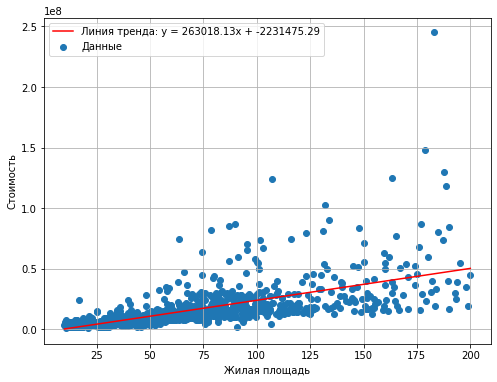

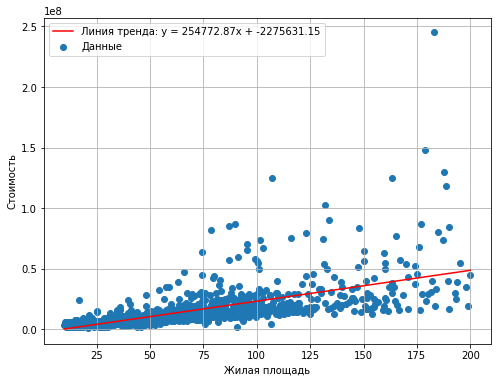

In [ ]:
#Зависимость цены от жилой площади
data_mean_living = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'mean')
data_median_living = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median')
data_mean_living = data_mean_living.reset_index()
data_median_living = data_median_living.reset_index()
charts(data_mean_living['last_price'], data_mean_living['living_area'], 'Жилая площадь')
charts(data_median_living['last_price'], data_median_living['living_area'], 'Жилая площадь')

In [ ]:
#Проверка на линейную зависимость
print('Коэффициент корреляции для среднего значения', data_mean_living['living_area'].corr(data_mean_living['last_price']))
print('Коэффициент корреляции для медианного значения', data_median_living['living_area'].corr(data_median_living['last_price']))

Коэффициент корреляции для среднего значения 0.686671451801706
Коэффициент корреляции для медианного значения 0.6796498299509642


**Аналогично прошлому выводу, прослеживается увеличение цены с увеличением площади, но коэффициенты корреляции уже меньше. Отсюда можно сказать, что площадь жилой зоны для покупателей меньший фактор отбора по сравнению с общей площадью, повлиять на это может площади других комнат, например.**

##### Зависимость от площади кухни

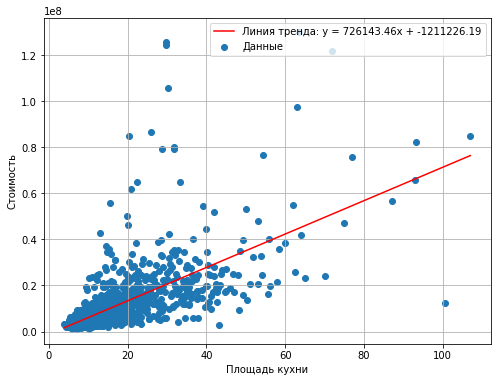

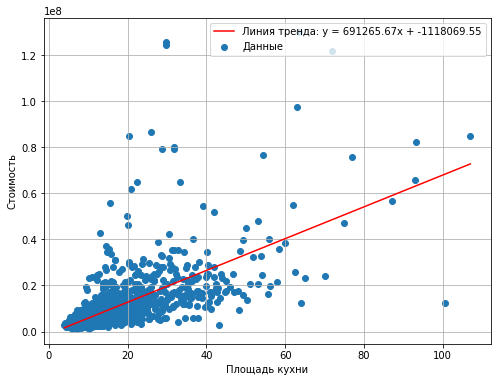

In [ ]:
#Зависимость от площади кухни
data_mean_kitchen = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'mean')
data_median_kitchen = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median')
data_mean_kitchen = data_mean_kitchen.reset_index()
data_median_kitchen = data_median_kitchen.reset_index()
charts(data_mean_kitchen['last_price'], data_mean_kitchen['kitchen_area'], 'Площадь кухни')
charts(data_median_kitchen['last_price'], data_median_kitchen['kitchen_area'], 'Площадь кухни')

In [ ]:
#Проверка на линейную зависимость
print('Коэффициент корреляции для среднего значения', data_mean_kitchen['kitchen_area'].corr(data_mean_kitchen['last_price']))
print('Коэффициент корреляции для медианного значения', data_median_kitchen['kitchen_area'].corr(data_median_kitchen['last_price']))

Коэффициент корреляции для среднего значения 0.6637186791826344
Коэффициент корреляции для медианного значения 0.6561706704043172


**На диаграмме, которая показывает увеличение цены с увеличнением площади кухни. А вот коэффициенты корреляции показали, что зависимоть цены от площади кухни более сильная, чем от жилой площади, предположение подтвердилось.**

##### Зависимость от количества комнат

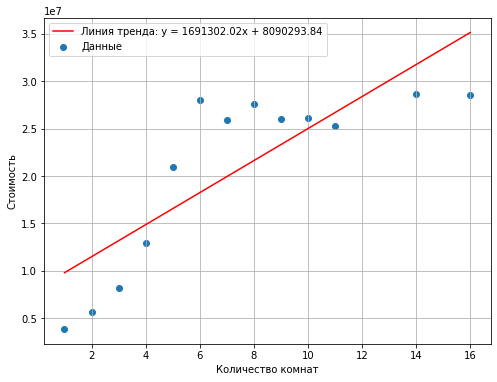

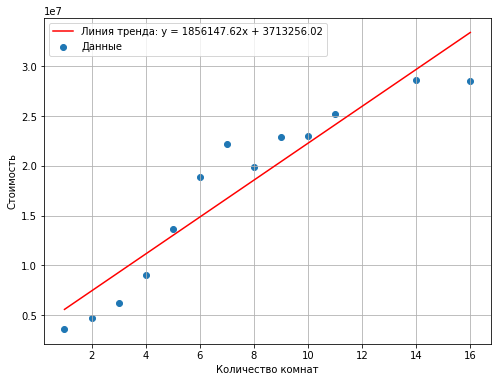

In [ ]:
#Зависимость от количества комнат
data_mean_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
data_median_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
data_mean_rooms = data_mean_rooms.reset_index()
data_median_rooms = data_median_rooms.reset_index()
charts(data_mean_rooms['last_price'], data_mean_rooms['rooms'], 'Количество комнат')
charts(data_median_rooms['last_price'], data_median_rooms['rooms'], 'Количество комнат')

In [ ]:
#Проверка на линейную зависимость
print('Коэффициент корреляции для среднего значения', data_mean_rooms['rooms'].corr(data_mean_rooms['last_price']))
print('Коэффициент корреляции для медианного значения', data_median_rooms['rooms'].corr(data_median_rooms['last_price']))

Коэффициент корреляции для среднего значения 0.8189566921522162
Коэффициент корреляции для медианного значения 0.9430756129448368


**Из полученных коэффициентов корреляции видно, что при группировке по медианным значениям зависимость между ценой на квартиру и количеством комнат является очень сильной и положительной, так как коэффициент равен 0,94. Это означает, что цена на квартиру в значительной степени зависит от количества комнат, и, вероятно, увеличение количества комнат приводит к увеличению цены на квартиру.**


**С другой стороны, при группировке по средним значениям коэффициент корреляции 0.81 показывает, что зависимость между ценой на квартиру и количеством комнат все равно остается положительной, но менее сильной. В данном случае изменения в количестве комнат напрямую влияют на изменения в цене на квартиру, но эта зависимость может быть менее выраженной и болee разрозненной.**


**Таким образом, зависимость цены на квартиру от количества комнат демонстрирует более сильную связь при группировке по медианным значениям, чем при группировке по средним значениям.**

##### Зависимость от этажа

Text(0, 0.5, 'Медианная цена')

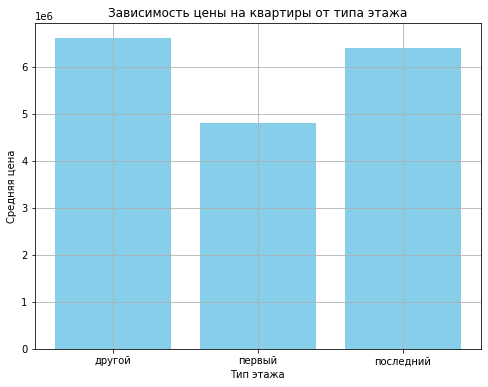

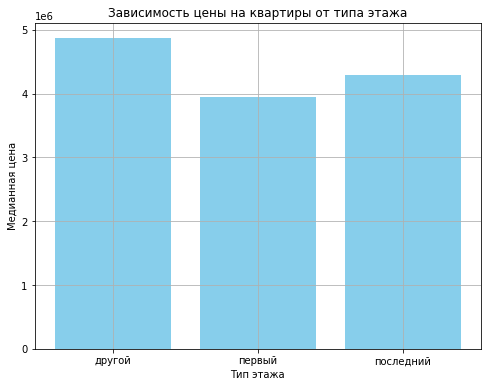

In [ ]:
#Зависимость от этажа
data_mean_type = data.groupby('floor_type')['last_price'].mean().reset_index()
data_median_type = data.groupby('floor_type')['last_price'].median().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(data_mean_type['floor_type'], data_mean_type['last_price'], color='skyblue')
plt.title('Зависимость цены на квартиры от типа этажа')
plt.grid(True)
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена')
plt.figure(figsize=(8, 6))
plt.bar(data_median_type['floor_type'], data_median_type['last_price'], color='skyblue')
plt.grid(True)
plt.title('Зависимость цены на квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Медианная цена')
#plt.show()


**По выведенным диаграммам видим, что при группировке сводной таблицы по средней цене, стоимость недвижимости преобладает на этажах между 1 и последним, а на 1 этаже самые дешевые.**


**В свою очередь группировка по медианным значениям показала тот же самый результат.**

##### Зависимость от дня недели

Text(0, 0.5, 'Медианная цена')

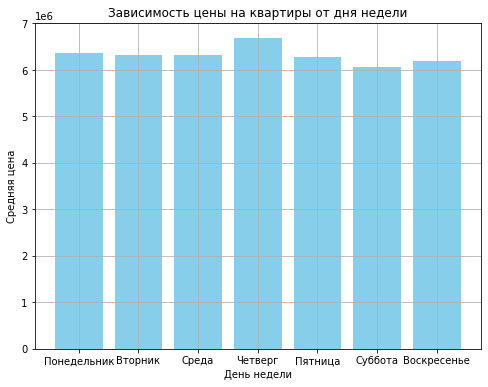

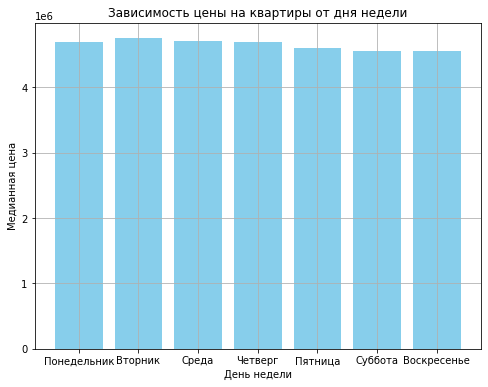

In [ ]:
data_mean_week = data.groupby('day_week_publication')['last_price'].mean().reset_index()
data_median_week = data.groupby('day_week_publication')['last_price'].median().reset_index()
days_of_week = {
    "Понедельник": 1,
    "Пятница": 5,
    "Воскресенье": 7,
    "Среда": 3,
    "Четверг": 4,
    "Вторник": 2,
    "Суббота": 6
}
data_mean_week['sequence_number'] = data_mean_week['day_week_publication'].map(days_of_week)
data_median_week['sequence_number'] = data_median_week['day_week_publication'].map(days_of_week)
data_mean_week = data_mean_week.sort_values(by = 'sequence_number')
data_median_week = data_median_week.sort_values(by = 'sequence_number')
plt.figure(figsize=(8, 6))
plt.bar(data_mean_week['day_week_publication'], data_mean_week['last_price'], color='skyblue')
plt.title('Зависимость цены на квартиры от дня недели')
plt.grid(True)
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.figure(figsize=(8, 6))
plt.bar(data_median_week['day_week_publication'], data_median_week['last_price'], color='skyblue')
plt.grid(True)
plt.title('Зависимость цены на квартиры от дня недели')
plt.xlabel('День недели')
plt.ylabel('Медианная цена')

<div class='alert alert-info'>
    По построенным двум диаграммам по средний и медианным значениям можно сказать, что средняя цена колеблется хаотично, в субботу наблюдаем мимнимум цены, а в четверг максимум. А медианная цена равномерно сначала поднялась и во вторник принимает пиковое значение, а потом равномерно спадает и в воскресенье также наблюдаем минимум.
</div>

##### Зависимость от месяца

Text(0, 0.5, 'Медианная цена')

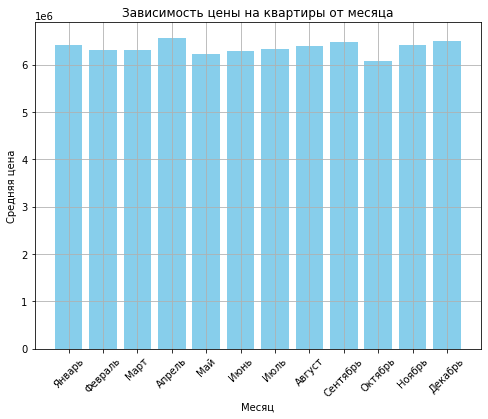

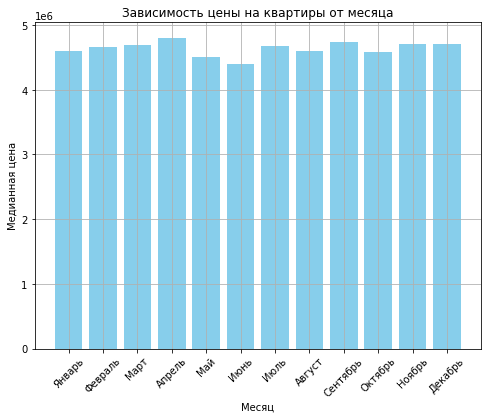

In [ ]:
data_mean_month = data.groupby('month')['last_price'].mean().reset_index()
data_median_month = data.groupby('month')['last_price'].median().reset_index()
month = {'Январь': 1,
         'Февраль': 2,
         'Март': 3,
         'Апрель': 4,
         'Май': 5,
         'Июнь': 6,
         'Июль': 7,
         'Август': 8,
         'Сентябрь': 9,
         'Октябрь': 10,
         'Ноябрь': 11,
         'Декабрь': 12}
data_mean_month['sequence_number'] = data_mean_month['month'].map(month)
data_median_month['sequence_number'] = data_median_month['month'].map(month)
data_mean_month = data_mean_month.sort_values(by = 'sequence_number')
data_median_month = data_median_month.sort_values(by = 'sequence_number')

plt.figure(figsize=(8, 6))
plt.bar(data_mean_month['month'], data_mean_month['last_price'], color='skyblue')
plt.title('Зависимость цены на квартиры от месяца')
plt.grid(True)
plt.xlabel('Месяц')
plt.xticks(rotation=45)
plt.ylabel('Средняя цена')
plt.figure(figsize=(8, 6))
plt.bar(data_median_month['month'], data_median_month['last_price'], color='skyblue')
plt.grid(True)
plt.title('Зависимость цены на квартиры от месяца')
plt.xlabel('Месяц')
plt.xticks(rotation=45)
plt.ylabel('Медианная цена')

<div class='alert alert-info'>
    Диаграмма зависимость среднего значения цены от месяца показала, что минимум и максимум располагаются по близости, так же как и было с днем недели, максмум в апреле, а минимум в октябре.
    А медианные значения также показывают себя более упорядочено, сначала повышение до пика в апреле и понижение до минимума в июне.
</div>

##### Зависимость от года

Text(0, 0.5, 'Медианная цена')

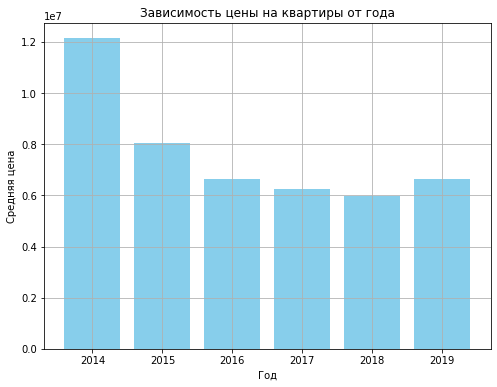

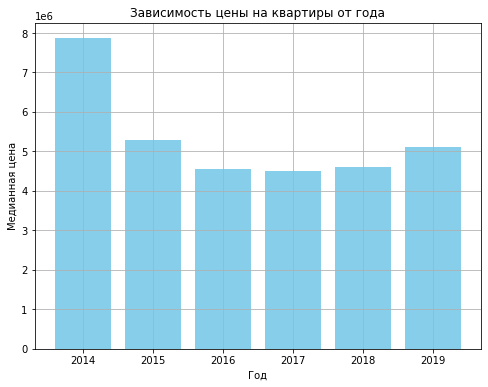

In [ ]:
data_mean_year = data.groupby('year')['last_price'].mean().reset_index()
data_median_year = data.groupby('year')['last_price'].median().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(data_mean_year['year'], data_mean_year['last_price'], color='skyblue')
plt.title('Зависимость цены на квартиры от года')
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.figure(figsize=(8, 6))
plt.bar(data_median_year['year'], data_median_year['last_price'], color='skyblue')
plt.grid(True)
plt.title('Зависимость цены на квартиры от года')
plt.xlabel('Год')
plt.ylabel('Медианная цена')

<div class='alert alert-info'>
    Получаем почти два одинаковых распределения, которые показывают максимум цены в 2014 году, далее резкий спад: минимум для средней цены в 2018 году, а для медианной в 2017 году.
</div>

#### 4.4 Отбор населённых пунктов

In [ ]:
#Топ 10
top_10_cities = data['locality_name'].value_counts().nlargest(10).index
filtered_data = data[data['locality_name'].isin(top_10_cities)][['locality_name', 'cost_of_one_square']]
summary_table = filtered_data.groupby('locality_name').agg({'cost_of_one_square': 'mean', 'locality_name': 'size'})
summary_table.columns = ['average_price', 'number_of_ads ']
summary_table = summary_table.sort_values(by = 'average_price', ascending = False).reset_index()
summary_table

,locality_name,average_price,number_of_ads
0,санкт-петербург,114133.593422,15331
1,пушкин,102773.218877,365
2,деревня кудрово,92244.698043,276
3,поселок парголово,90401.787278,316
4,поселок мурино,84842.411853,502
5,поселок шушары,78303.212696,434
6,колпино,75408.350475,337
7,гатчина,68746.146515,307
8,всеволожск,68723.176718,390
9,выборг,58238.143277,235


In [ ]:
print('Населёный пункт с самой высокой стоимостью квадртного метра: ', summary_table.locality_name[0])
print('Населёный пункт с самой низкой стоимостью квадртного метра: ', summary_table.locality_name[summary_table.shape[0]-1])

Населёный пункт с самой высокой стоимостью квадртного метра:  санкт-петербург
Населёный пункт с самой низкой стоимостью квадртного метра:  выборг


#### 4.5 Зависимость стоимости от расстояния от центра.

Text(0.5, 1.0, 'Зависимость цены от расстояния')

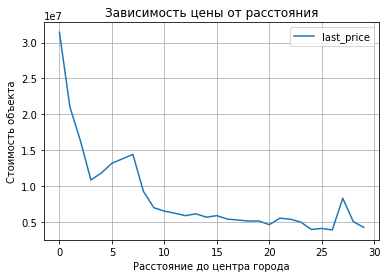

In [ ]:
data_saint_petersburg = data.query('locality_name == "санкт-петербург"').reset_index()
data_saint_petersburg.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean').plot(grid = True)
plt.xlabel('Расстояние до центра города')
plt.ylabel('Cтоимость объекта')
plt.title('Зависимость цены от расстояния')

In [ ]:
data_saint_petersburg.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean').sort_values(by = 'last_price', ascending = False)

,last_price
cityCenters_nearest_km,
0.0,3.144912e+07
1.0,2.102856e+07
2.0,1.631616e+07
7.0,1.441802e+07
6.0,1.379094e+07
5.0,1.317586e+07
4.0,1.182015e+07
3.0,1.083920e+07
8.0,9.273004e+06


<div class='alert alert-info'>
    Построен график зависимости стоимости объекта от километража от центра города Санкт-Петербург. Учтен каждый километр расстояния. Что и по графику и по сводной таблице видим, что максмальная стоимость недвижимости в центре города и её стоимость составляет 31,5 миллиона рублей, а минимальная на расстоянии 26 километров, со стоимостью почти в 4 миллиона рублей.
</div>

In [ ]:
print('Процент удаленных строк:')
((shape_start-data.shape[0])/shape_start) * 100

Процент удаленных строк:


2.413603949533736

### 5 Напишите общий вывод

Проведенный анализ данных о рынке недвижимости в Санкт-Петербурге и его окрестностях позволил выявить важные закономерности и тренды.
1) В ходе предобработки данных:
- были обнаружены и обработаны пропущенные значения, найдено их было много. В некторых столбцах пропусков было мало и они не повлияли бы на данные  и были удалены. В столбце с количеством балконов пропуски были просто заполнены 0, так как отсутствие значения может следовать из отсутствия самого балкона. Также столбец с  подтверждением является ли недвижимость апартаментами или нет был заполнен с условие, что в квартире больше 1 комнаты и общая площадь более 40 $м^2$;
- типы данных были изменены для удобства анализа: найден столбец с датой, тип которого преобразован в соответствующий тип даты, также есть столбцы с количественными данными, их тип float преобразован в int. Другие столбцы с количественными данными остались без изменения типа, так как там присутствуют пропущенные значения
- удалены неявные дубликаты, явных дубликатов не обнаружено.


2) Добавление новых столбцов с ценой за квадратный метр, днем, месяцем и годом публикации объявления, а также расстоянием до центра города в километрах, позволило более глубоко изучить данные и выделить важные параметры в исследовательском анализе.


3) Проведенный исследовательский анализ выявил:
- аномалии, с помощью построенных гистограмм можно было наглядно увидеть выделяющиеся значения, что-то было удалено, общая доля удаленных строк составила 2.4 %, что является допустимым. Некоторые значения можно было корректировать с помощью математических преобразований, чтобы избежать удаления большого количества данных;
- время продажи квартир, построенна гистограмма и также выведено среднее, медианное, максмальное и минимальное количество дней, сколько продавалась квартира. Из этих данных можно сказать, что в среднем продажа квартиры занимает около полугода (181 день). Однако, медианное значение продолжительности продажи (121 день) говорит о том, что половина квартир продается быстрее, чем за это время. Максимальное значение в 1580 дней и минимальное в 1 день указывают на тот факт, что временные рамки продажи могут значительно различаться в зависимости от конкретной ситуации и рыночных условий. Построена диаграмма размаха, которая показала, что недвижимость, которая продавалась меньше 45 дней и дольше 232 дней, продается слишком быстро и слишком долго соответственно, если срок продажи лежит в промежутке этого времени, то срок соответствует нормальному времени продажи
- факторы, влияющие на общую стоимость объекта, для каждой заданной зависимости (общей площади;
жилой площади;
площади кухни ;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другoй);
даты размещения (день недели, месяц, год был расчитан коэффициент корреляции, для определения наличии линейной зависимости, выведены точечные диаграммы с линией тренда)
- а также позволил идентифицировать населенные пункты с самой высокой и самой низкой стоимостью . По итогу получилось, что населёный пункт с самой высокой стоимостью квадртного метра:  санкт-петербург;  населёный пункт с самой низкой стоимостью квадртного метра:  выборг
- и заключительным этапом было проследить зависимость цены недвижимости от каждого километра по удалению от центра города Санкт-Петербург. Самая дорогостящая недвижимость находится в самом центре города со стоимостью 31,5 миллионов, а самая дешевая на расстоянии 26 километров со стоимостью 4 миллионов.


Благодаря проведенному проекту были выявлены ключевые закономерности на рынке недвижимости, что может быть полезно для принятия обоснованных решений в сфере недвижимости и инвестиций.